# Problem Set 5, due May 30 at 11:59am, mid-day, noon.

As usual, you are highly encouraged to start this problem set early.  There are a lot of components to this problem set, but my hope is that no single problem will take too much time. There are several opportunities to earn extra credit in this problem set, and Part 3 gives you considerable leeway in how thorough to make your analysis.

## Part 1: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib inline

bdata = load_boston()

# Setup indices
indx = {feature: index for index, feature in enumerate(bdata.feature_names)}

# Matplotlib setup
font = {'size': 12}

plt.rc('font', **font)

### 1.1 Yet another scatterplot

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Then, just use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Regression for MEDV ~ CRIM:
	Coefficients: [-0.4550384]
	Intercept: 24.5499847418
	Residual mean square error training: 8.77
	Residual mean square error testing: 7.93


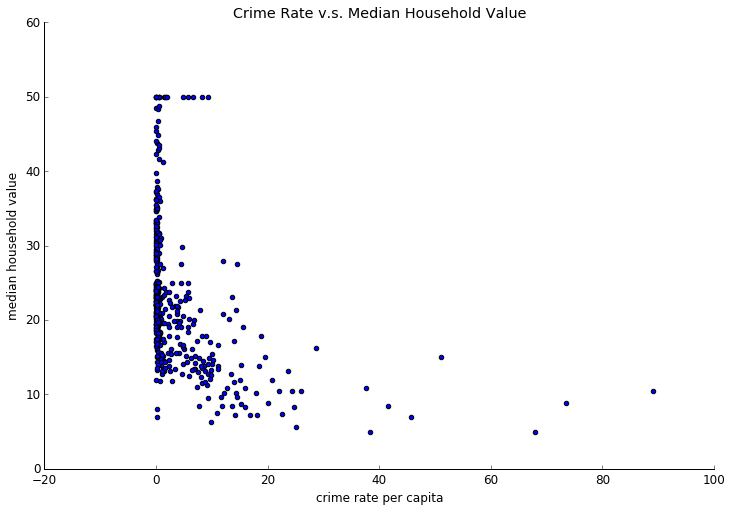

In [2]:
# Simplify the axes of the figure for presentation.
def simple_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.figure(figsize=(12, 8))
plt.scatter(bdata.data[:, np.newaxis, indx['CRIM']], bdata.target)
plt.title('Crime Rate v.s. Median Household Value')
plt.xlabel('crime rate per capita')
plt.ylabel('median household value')
simple_axes(plt.axes())

boston_train, boston_test, boston_medv_train, boston_medv_test = train_test_split(
    bdata.data, bdata.target, train_size=0.66, random_state=42)

boston_crim_train = boston_train[:, np.newaxis, indx['CRIM']]
boston_crim_test = boston_test[:, np.newaxis, indx['CRIM']]

crim_medv_reg = LinearRegression()
crim_medv_reg.fit(boston_crim_train, boston_medv_train)

print 'Regression for MEDV ~ CRIM:'
print '\tCoefficients:', crim_medv_reg.coef_
print '\tIntercept:', crim_medv_reg.intercept_
print('\tResidual mean square error training: %.2f'
      % np.sqrt(np.mean((crim_medv_reg.predict(boston_crim_train) - boston_medv_train) ** 2)))
print('\tResidual mean square error testing: %.2f'
      % np.sqrt(np.mean((crim_medv_reg.predict(boston_crim_test) - boston_medv_test) ** 2)))



### 1.2 Scatterplot matrices

Choose 8 out of the of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](http://iogas.net/wp-content/gallery/iogas-evaluation/scatterplot-matrix-point-density.png).

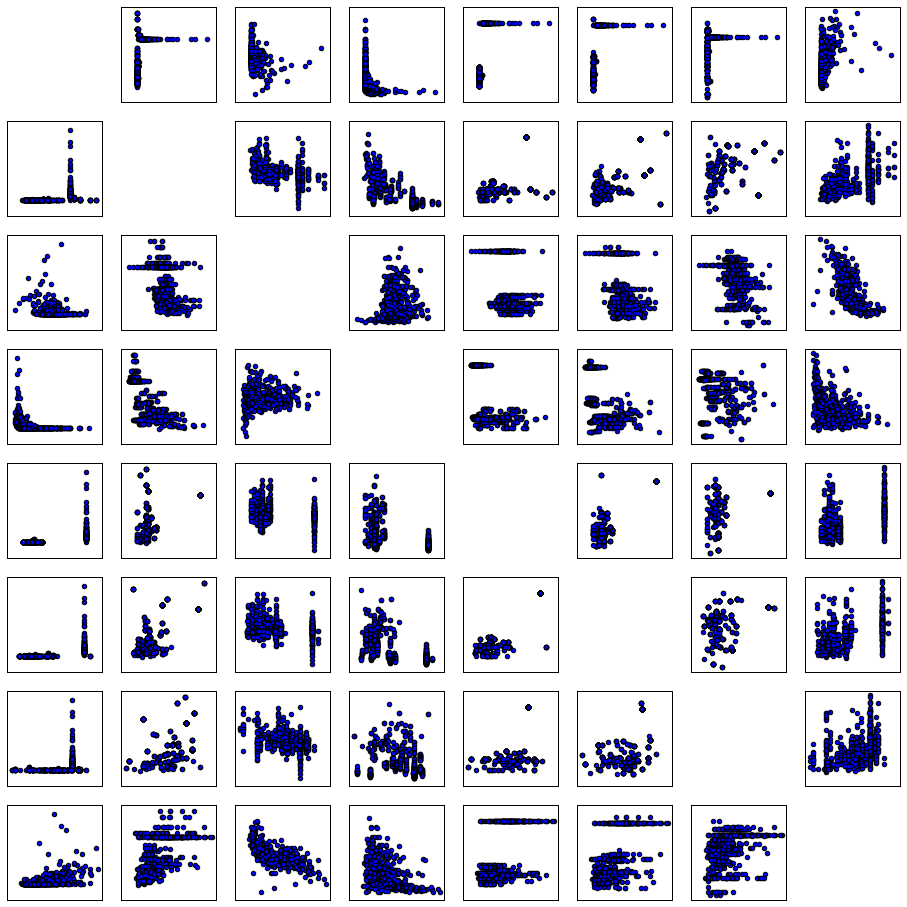

In [3]:
chosen_features = ['CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
    
plt.figure(figsize=(16,16))
for i in xrange(8):
    for j in xrange(8):
        if i == j:
            continue
        ax = plt.subplot(8, 8, i * 8 + j + 1)
        plt.scatter(bdata.data[:, np.newaxis, indx[chosen_features[i]]],
                    bdata.data[:, np.newaxis, indx[chosen_features[j]]])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

### 1.3 PCA to the rescue

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.

[ 0.46740996  0.11393706  0.09681368  0.07011299  0.06032544  0.05242669
  0.03887247  0.02951807  0.02168342  0.01769344  0.0144805   0.01200812]


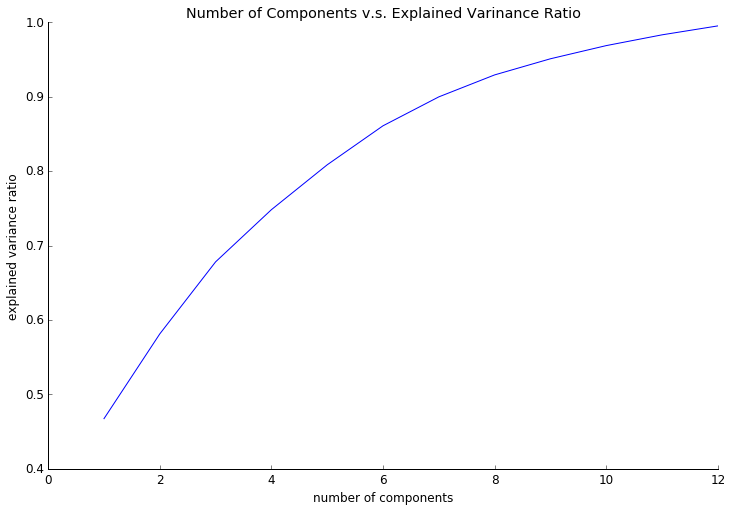

In [4]:
# Standardize the given data.
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

boston_train_std = standardize(boston_train)
boston_test_std = standardize(boston_test)

boston_pca = PCA(n_components=12)
boston_pca.fit(boston_train_std)
print boston_pca.explained_variance_ratio_
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, boston_pca.n_components + 1, 1), np.cumsum(boston_pca.explained_variance_ratio_))
plt.title('Number of Components v.s. Explained Varinance Ratio')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
simple_axes(plt.axes())

### 1.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

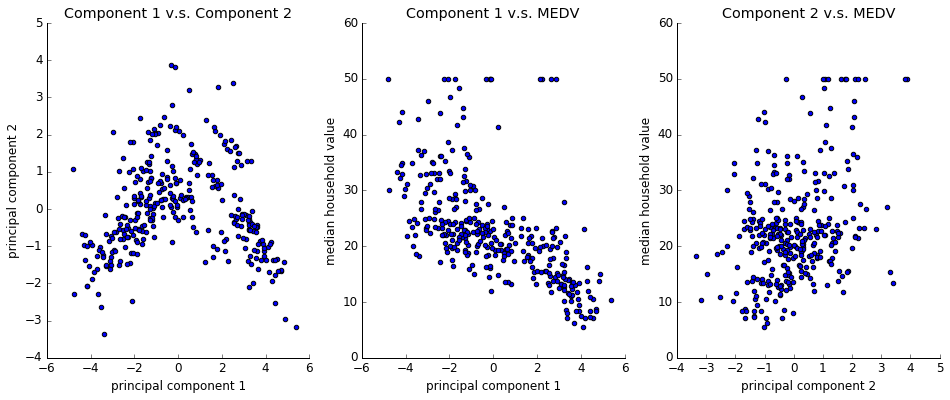

In [5]:
pca2 = PCA(n_components=2)
components = pca2.fit_transform(boston_train_std)

component1 = components[:, np.newaxis, 0]
component2 = components[:, np.newaxis, 1]

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 3, 1)
ax1.scatter(component1, component2)
ax1.set_title('Component 1 v.s. Component 2')
ax1.set_xlabel('principal component 1')
ax1.set_ylabel('principal component 2')
simple_axes(ax1.axes)

ax2 = plt.subplot(1, 3, 2)
ax2.scatter(component1, boston_medv_train)
ax2.set_title('Component 1 v.s. MEDV')
ax2.set_xlabel('principal component 1')
ax2.set_ylabel('median household value')
simple_axes(ax2.axes)

ax3 = plt.subplot(1, 3, 3)
ax3.scatter(component2, boston_medv_train)
ax3.set_title('Component 2 v.s. MEDV')
ax3.set_xlabel('principal component 2')
ax3.set_ylabel('median household value')
simple_axes(ax3.axes)

### 1.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 1.1?  Interpret your results!

In [6]:
component1_train = pca2.fit_transform(boston_train_std)[:, [0]]
component1_test = pca2.fit_transform(boston_test_std)[:, [0]]

pca_reg = LinearRegression()
pca_reg.fit(component1_train, boston_medv_train)

print 'Regression for MEDV ~ PCA1:'
print '\tCoefficients:', pca_reg.coef_
print '\tIntercept:', pca_reg.intercept_
print('\tResidual mean square error training: %.2f'
      % np.sqrt(np.mean((pca_reg.predict(component1_train) - boston_medv_train) ** 2)))
print('\tResidual mean square error testing: %.2f'
      % np.sqrt(np.mean((pca_reg.predict(component1_test) - boston_medv_test) ** 2)))


Regression for MEDV ~ PCA1:
	Coefficients: [-2.29577683]
	Intercept: 23.0267267267
	Residual mean square error training: 7.57
	Residual mean square error testing: 6.76


It seems that the regression using PCA and the simple regression with CRIM data from the previous section are very similar, though the PCA regression seems to have slightly lower RMSE values for both the train and test sets. The regression yields a y-intercept of 23.03 and a slope of -2.3 for the first component of the PCA.

## Part 2: Trees and Forests

You should use the [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) libraries in sklearn for this problem.

### 2.1 Binary features, binary outcome

Convert a few of the continuous variables to binary indicators: Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000.  Create a new binary variable HIGH_CRIME, which is 1 iff CRIM>10. Create another new binary variable BIG which is 1 iff RM>6.

Using 10-fold cross-validation, use [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to fit a decision tree that predicts EXPENSIVE based on the values of HIGH_CRIME, BIG, and CHAS. Report the average training and testing accuracy across your 10 folds, and show a diagram of the tree (at least the first three levels).

Training
Accuracy scores for all iterations: [0.75824175824175821, 0.73626373626373631, 0.76923076923076927, 0.7384615384615385, 0.7384615384615385, 0.73186813186813182, 0.73903508771929827, 0.7521929824561403, 0.77631578947368418, 0.77192982456140347]
Avg. accuracy across all iterations: 0.751200115674

Testing
Accuracy scores for all iterations: [0.68627450980392157, 0.88235294117647056, 0.58823529411764708, 0.86274509803921573, 0.84313725490196079, 0.90196078431372551, 0.85999999999999999, 0.73999999999999999, 0.52000000000000002, 0.56000000000000005]
Avg. accuracy across all iterations: 0.744470588235


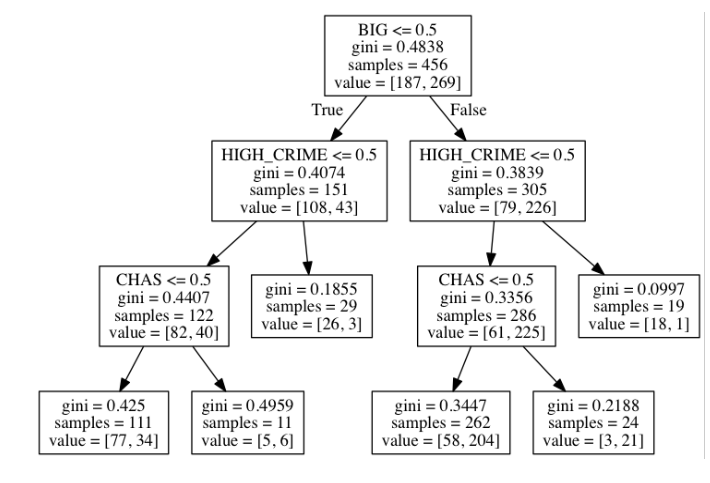

In [7]:
import subprocess
import matplotlib.image as mpimg
from sklearn import tree

def compute_rmse(predictions, actual):
    return np.sqrt(np.mean((predictions - actual) ** 2))

def visualize_tree(dtree, feature_names, figsize=(12,8)):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        tree.export_graphviz(dtree, out_file=f,
                             feature_names=feature_names)
        
    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
        plt.figure(figsize=figsize)
        plt.imshow(mpimg.imread('dt.png'), aspect='auto')
        plt.axis('off')
    except Exception as e:
        print e
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

# Setup dataframe for convenience
boston_df = pd.DataFrame(bdata.data)
boston_df.columns = bdata.feature_names
boston_df['MEDV'] = bdata.target
boston_df['EXPENSIVE'] = np.asarray(boston_df.MEDV > 20, dtype=np.int)
boston_df['HIGH_CRIME'] = np.asarray(boston_df.CRIM > 10, dtype=np.int)
boston_df['BIG'] = np.asarray(boston_df.RM > 6, dtype=np.int)

basic_tree_df = boston_df[['HIGH_CRIME', 'BIG', 'CHAS']]
train_scores = []
test_scores = []
decision_tree = None
for train, test in KFold(n=len(bdata.data), n_folds=10, random_state=42):
    basic_x_train = basic_tree_df.iloc[train]
    basic_y_train = boston_df.iloc[train].EXPENSIVE
    decision_tree = tree.DecisionTreeClassifier()
    decision_tree.fit(basic_x_train, basic_y_train)
    train_scores.append(decision_tree.score(basic_x_train, basic_y_train))
    test_scores.append(decision_tree.score(basic_tree_df.iloc[test], boston_df.iloc[test].EXPENSIVE))

print 'Training'
print 'Accuracy scores for all iterations:', train_scores
print 'Avg. accuracy across all iterations:', np.mean(train_scores)
print

print 'Testing'
print 'Accuracy scores for all iterations:', test_scores
print 'Avg. accuracy across all iterations:', np.mean(test_scores)

visualize_tree(decision_tree, basic_tree_df.columns)

It looks like the most significant variable split that determines house expensiveness in the BIG variable, then the HIGH_CRIM, and then the CHAS variable.

### 2.2 Tree diagram


Use all of the data to re-fit a single decision tree with max_depth = 4 (i.e., no cross-validation). Then, use the built-in sklearn libraries to create a diagram of the tree itself. Interpret what you see.

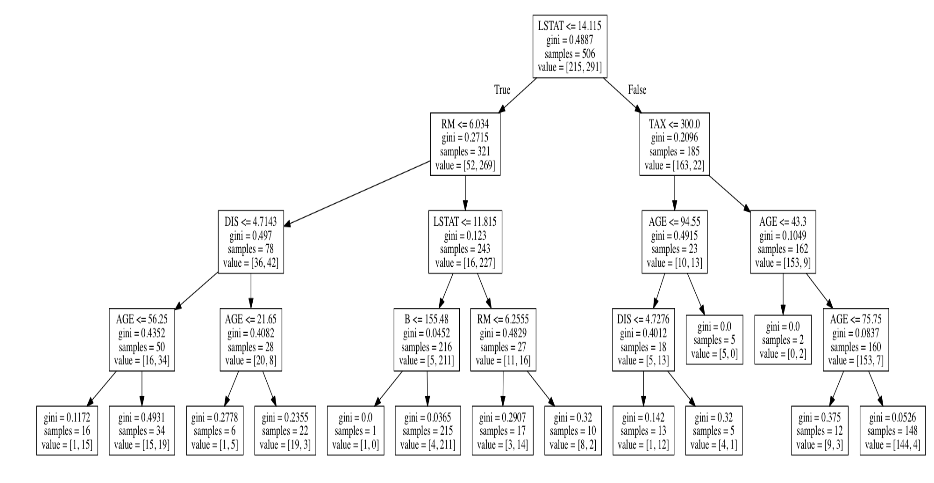

In [8]:
treed_df = boston_df.drop(['EXPENSIVE', 'MEDV', 'HIGH_CRIME', 'BIG'], axis=1)
dtree = tree.DecisionTreeClassifier(max_depth=4)
dtree.fit(treed_df, boston_df.EXPENSIVE)
visualize_tree(dtree, treed_df.columns, figsize=(16, 8))

The decision tree for the entire data shows that LSTAT (lower status of the population) is the feature that provides the most information gain right off the bat. Other features that seem to have an effect are the taxes in the neighborhood, the AGE, the number of rooms (RM) and also the percentage of black population (B).

### Extra Credit: Sensitivity analysis
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of max_depth and min_samples_leaf affects test accuracy. To do this, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest accuracy?

In [9]:
# Enter your code here

*Enter your observations here*

### 2.3 Regression Trees
Use the [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) function to predict median housing value based on your favorite set of covariates. Report the average 10-fold cross-validated RMSE, separately for the training data and for the testing data. 

How do your RMSE values compare to those you obtained using nearest neighbors, and (regularized) linear regression?

In [10]:
from sklearn.cross_validation import cross_val_predict
chosen_features = ['CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
boston_chosen_df = boston_df[chosen_features]

dtree_reg = tree.DecisionTreeRegressor(random_state=42)
train_rmses = []
test_rmses = []
for train, test in KFold(n=len(boston_chosen_df), n_folds=10):
    dtree_reg.fit(boston_chosen_df.iloc[train], boston_df.iloc[train].MEDV)
    train_predictions = dtree_reg.predict(boston_chosen_df.iloc[train])
    test_predictions = dtree_reg.predict(boston_chosen_df.iloc[test])
    train_rmses.append(compute_rmse(train_predictions, boston_df.iloc[train].MEDV))
    test_rmses.append(compute_rmse(test_predictions, boston_df.iloc[test].MEDV))

print 'Training'
print 'RMSEs:', train_rmses
print 'Avg decision tree regressor RMSE:', np.mean(train_rmses)
print
print 'Testing'
print 'RMSEs:', test_rmses
print 'Avg decision tree regressor RMSE:', np.mean(test_rmses)

Training
RMSEs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Avg decision tree regressor RMSE: 0.0

Testing
RMSEs: [4.4622161029044305, 3.7750470715153814, 4.5109887616622517, 7.3698777492720788, 4.902460366699442, 6.1102613788320914, 3.7642263481358289, 10.737951387485417, 9.9301057396182859, 6.1783654796394174]
Avg decision tree regressor RMSE: 6.17415003858


We got an RMSE score that is smaller than both the KNN rmse and regularized linear regression but also very similar. Something interesting that I saw was that the training RMSE was 0, which means that somehow the model fits the data perfectly.

### 2.4 Build your own random forest
Using your model from 2.1, build a forest of 100 trees. Do this manually, i.e., don't rely on existing packages.

To accomplish this, first split your data into 10 folds for cross validation. For each fold, take the training data and use bootstrap resampling of your original data to construct 100 new training datasets (each one should be slightly different!). Then, using your optimal values of max_depth and min_samples_leaf from earlier, fit a separate decision tree to each sample. Classify each of your test instances as the class chosen by the majority of the 100 trees. Repeat this process for each of your 10 folds.

What is the cross-validated accuracy of your random forest classifier? How does it compare to the results from 2.1? Is this what you expected? Why or why not?

In [11]:
from sklearn.metrics import accuracy_score

MAGIC_SAMPLE_PROPORTION = 0.632
NUM_TREES = 100

accuracy_scores = []
dtree_classifier = tree.DecisionTreeClassifier(max_depth=4)
for train, test in KFold(n=len(basic_tree_df), n_folds=10):
    boston_test_df = basic_tree_df.iloc[test]
    expensive_test = boston_df.EXPENSIVE.iloc[test]
    classifications = []
    for i in range(NUM_TREES):
        bootstrap_sample = np.random.choice(train, 
                                            size=int(np.round(len(train) * MAGIC_SAMPLE_PROPORTION)),
                                            replace=True)
        dtree_classifier.fit(basic_tree_df.iloc[bootstrap_sample], boston_df.EXPENSIVE.iloc[bootstrap_sample])
        classifications.append(dtree_classifier.predict(boston_test_df))
    
    collapsed = np.sum(classifications, axis=0)
    predictions = [int(sum_expensive >= NUM_TREES / 2.) for sum_expensive in collapsed]
    accuracy_scores.append(accuracy_score(expensive_test, predictions))
    
print 'All scores:', accuracy_scores
print 'Avg of accuracy scores:', np.mean(accuracy_scores)

All scores: [0.68627450980392157, 0.88235294117647056, 0.58823529411764708, 0.86274509803921573, 0.84313725490196079, 0.90196078431372551, 0.85999999999999999, 0.73999999999999999, 0.52000000000000002, 0.56000000000000005]
Avg of accuracy scores: 0.744470588235


The average score seems to be exactly the same for random forest and decision tree for this problem. I expected some improvement in the scores using random forest, but it seems that that's probably the best accuracy we could get for this model.

### Extra Credit: Implement a Decision Tree in Python

For extra credit, put away the canned algorithm from sklearn, and write your own decision tree algorithm. Use the simple recursive algorithm we described in class, and train it on the boston housing prices data. Use the target variable  EXPENSIVE, and the following three binary input variables: CHAS, HIGH_CRIME, BIG.

Do not worry about implementing bells and whistles. However, you will definitely need the following:
 * A "BuildTree" function that implements the recursive algorithm
 * A function to calculate information gain
 
For this problem, you can consult the internets to see how other have done this. However, you must make your code your own - do not plagiarize the examples of other peoples. Implement the minimum required code to build a decision tree

In [12]:
# Enter your code here

## Part 3: Putting together the pieces

At this point, you have learned the nuts and bolts of a large number of machine learning algorithms. This includes: 
* Nearest Neighbor
* k-Nearest Neighbors
* Linear Regression
* Logistic Regression
* LASSO / Ridge Regression
* Support Vector Machines
* Naive Bayes
* Decision Trees
* Regression Trees
* Random Forests
* Adaboost
* Perceptrons
* Neural Networks

Your mission now is to use your knowledge of supervised machine learning to try an predict which passengers aboard the Titanic were most likely to survive. The prompts for this part of the problem set are deliberately vague - the goal is to leave it up to you how to structure (most of) your analysis.

To get started, read about the prediction problem on [Kaggle](https://www.kaggle.com/c/titanic). Then, download the data [here](https://www.kaggle.com/c/titanic/data) - you'll want at least the train and test data, maybe more.

### 3.1 Exploratory data analysis

Create a few figures and tables that help give you a feel for the data.

In [13]:
# Load the titanic data
titanic_train_df = pd.read_csv('titanic/train.csv').set_index('PassengerId')
titanic_test_df = pd.read_csv('titanic/test.csv').set_index('PassengerId')
titanic_train_df['Sex'] = np.asarray(titanic_train_df['Sex'] == 'female', dtype=np.int)
titanic_test_df['Sex'] = np.asarray(titanic_test_df['Sex'] == 'female', dtype=np.int)
titanic_train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


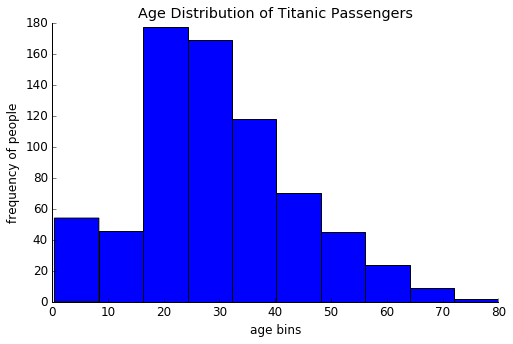

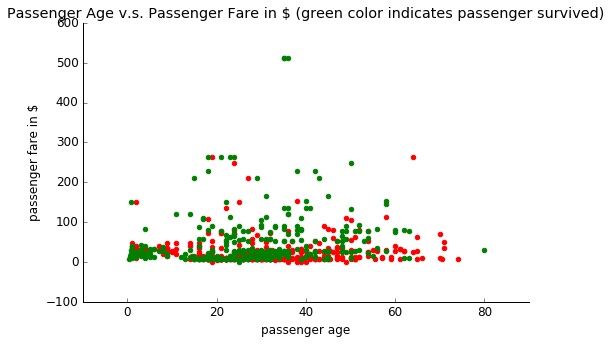

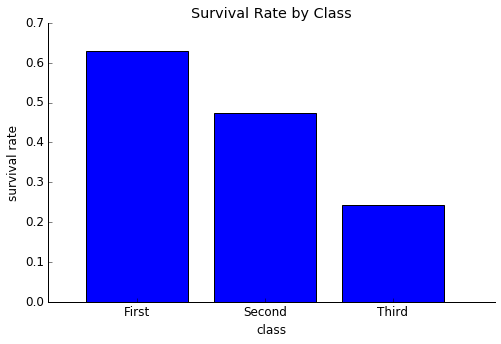

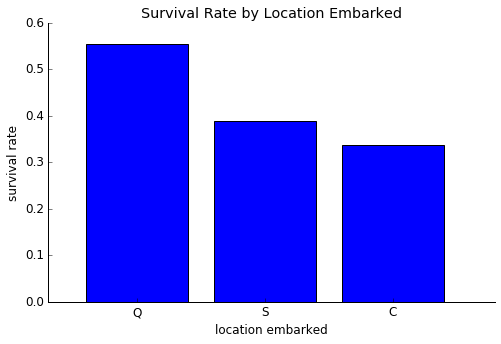

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_train_df[~np.isnan(titanic_train_df.Age)].Age)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('age bins')
plt.ylabel('frequency of people')
simple_axes(plt.axes())

age_fare_df = titanic_train_df[~np.isnan(titanic_train_df.Age)]
age_fare_df = age_fare_df[~np.isnan(age_fare_df.Fare)]

plt.figure(figsize=(8, 5))
plt.scatter(age_fare_df[age_fare_df.Survived == 0].Age, age_fare_df[age_fare_df.Survived == 0].Fare, color='r')
plt.scatter(age_fare_df[age_fare_df.Survived == 1].Age, age_fare_df[age_fare_df.Survived == 1].Fare, color='g')
plt.title('Passenger Age v.s. Passenger Fare in $ (green color indicates passenger survived)')
plt.xlabel('passenger age')
plt.ylabel('passenger fare in $')
simple_axes(plt.axes())

plt.figure(figsize=(8, 5))
plt.bar(np.asarray([1, 2, 3]) + 0.8, titanic_train_df.groupby('Pclass').Survived.mean())
plt.axes().set_xticks(np.asarray([1, 2, 3]) + 1.2)
plt.axes().set_xticklabels(('First', 'Second', 'Third'))
plt.title('Survival Rate by Class')
plt.xlabel('class')
plt.ylabel('survival rate')
simple_axes(plt.axes())

plt.figure(figsize=(8, 5))
plt.bar(np.asarray([1, 2, 3]) + 0.8, titanic_train_df.groupby('Embarked').Survived.mean())
plt.axes().set_xticks(np.asarray([1, 2, 3]) + 1.2)
plt.axes().set_xticklabels(titanic_train_df.groupby('Embarked').groups)
plt.title('Survival Rate by Location Embarked')
plt.xlabel('location embarked')
plt.ylabel('survival rate')
simple_axes(plt.axes())

We can see a few important things right off the bat with these charts. The ages of passengers riding the titanic follows a normal distribution, there is no correlation between the age and the price of the ticket. However, there does seem to be a little clustering of survivors in the lower age groups. Finally, the class of the passenger had an enormous effect on the survival rate of the passenger.

### 3.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. What do you conclude?

In [15]:
from scipy.stats import ttest_ind

sex_survival = titanic_train_df.groupby('Sex').Survived
print 'Sex t-test:'
print 'Survival rate for men:', sex_survival.get_group(0).mean()
print 'Survival rate for women:', sex_survival.get_group(1).mean()
print 'p-value for survival rate by sex t-test:', ttest_ind(sex_survival.get_group(0),
                                                            sex_survival.get_group(1),
                                                            nan_policy='omit').pvalue
print


survival = titanic_train_df.groupby('Survived')
for feature in ['Fare', 'Age', 'SibSp', 'Parch']:
    print feature, 't-test:'
    print 'Avg. %s for non-surviving passengers:' % feature, survival.get_group(0)[feature].mean()
    print 'Avg. %s for surviving passengers:' % feature, survival.get_group(1)[feature].mean()
    print 'p-value for survival rate by price t-test:', ttest_ind(survival.get_group(0)[feature],
                                                                  survival.get_group(1)[feature],
                                                                  nan_policy='omit').pvalue
    print


Sex t-test:
Survival rate for men: 0.188908145581
Survival rate for women: 0.742038216561
p-value for survival rate by sex t-test: 1.40606613088e-69

Fare t-test:
Avg. Fare for non-surviving passengers: 22.1178868852
Avg. Fare for surviving passengers: 48.3954076023
p-value for survival rate by price t-test: 6.12018934192e-15

Age t-test:
Avg. Age for non-surviving passengers: 30.6261792453
Avg. Age for surviving passengers: 28.3436896552
p-value for survival rate by price t-test: 0.0391246540135

SibSp t-test:
Avg. SibSp for non-surviving passengers: 0.553734061931
Avg. SibSp for surviving passengers: 0.473684210526
p-value for survival rate by price t-test: 0.292243928698

Parch t-test:
Avg. Parch for non-surviving passengers: 0.329690346084
Avg. Parch for surviving passengers: 0.464912280702
p-value for survival rate by price t-test: 0.0147992453747



I ran a few preliminary t-tests to see how the different variables affect the survival rate. It seems that the most significant variables seem to be sex and class in the categorical realm, and fare and age in the numerical realm. Fare price especially had a very significant impact on the rate of survival of the passengers.

The order goes something like this for significance: Sex > Fare > Parch > Age

### 3.3 Predict survival

Use 2-3 different machine learning algorithms to predict who will survive the titanic. Use whatever variables you like, but make sure to understand what you are doing, i.e., don't blindly use a variable without understanding what it signifies, how it is coded (e.g., should a categorical variable be converted into a set of fixed effects?), whether it is missing observations, and so forth. Feel free to use built-in libraries, but make sure to cross-validate your model (on the training set!), and then report the test accuracy. How effectively can you predict survival, and what model works best?

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

selected_features = ['Sex', 'Fare', 'Age', 'Class1', 'Class2', 'Class3']
titanic_filtered_df = titanic_train_df[~np.isnan(titanic_train_df['Sex'])]
titanic_filtered_df = titanic_filtered_df[~np.isnan(titanic_filtered_df['Fare'])] 
titanic_filtered_df = titanic_filtered_df[~np.isnan(titanic_filtered_df['Age'])]
titanic_filtered_df['Class1'] = np.asarray(titanic_filtered_df.Pclass == 1, dtype=np.int)
titanic_filtered_df['Class2'] = np.asarray(titanic_filtered_df.Pclass == 2, dtype=np.int)
titanic_filtered_df['Class3'] = np.asarray(titanic_filtered_df.Pclass == 3, dtype=np.int)

classifiers = [
    (KNeighborsClassifier(n_neighbors=10), True),
    (RandomForestClassifier(n_estimators=85), False),
    (AdaBoostClassifier(), False)
]

all_scores = []
for train, test in KFold(n=len(titanic_filtered_df), n_folds=10, random_state=42):
    train_df = titanic_filtered_df.iloc[train]
    test_df = titanic_filtered_df.iloc[test]
    
    train_std_df = standardize(train_df[selected_features])
    test_std_df = standardize(test_df[selected_features])
    
    scores = []
    for classifier, std in classifiers:
        if std:
            classifier.fit(train_std_df, train_df.Survived)
            score = classifier.score(test_std_df[selected_features], test_df.Survived)
        else:
            classifier.fit(train_df[selected_features], train_df.Survived)
            score = classifier.score(test_df[selected_features], test_df.Survived)

        scores.append(score)
    all_scores.append(scores)

print 'Accuracy scores for all three models in order: (KNN, Random Forest, AdaBoost)'
print np.mean(all_scores, axis=0)

Accuracy scores for all three models in order: (KNN, Random Forest, AdaBoost)
[ 0.80825509  0.81668623  0.80539906]


I somehow managed to tweak the parameter on the models to come remarkbaly close to each other in accuracy. In general, it seems though that random forest usually wins with the highest accuracy scores but not all the time. With all of the models we can predict the survival rate with almost more than 80% accuracy. This is pretty good across the board. Considering also that random forest is actually random, the accuracy score fluctuates from run to run. KNN and AdaBoost both give consistent accuracy scores of 80%+, so they may actually be preferable in certain situations.

### Extra Credit: Develop an ensemble

Create an ensemble learner by hand. Using all of the training data, fit as many different machine learning algorithms as you can. Then, to classify each instance in the test data, take the majority vote of all of your different fitted models. How accurately do you predict survival? How does this compare to your earlier results? 

*Note:* It will make your life easier if you use an odd number of algorithms!

In [17]:
# Enter your code here

*Enter your observations here*